In [2]:
import warnings
warnings.filterwarnings('ignore')

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

# 1. 다중 클래스 분류용 선형 모델

In [3]:
import mglearn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_blobs

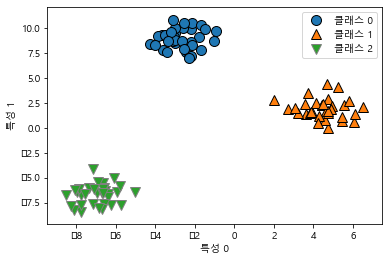

In [4]:
# 데이터 셋 가져오기
# 3개의 클래스 2차원데이터, 각 클래스의 데이터는 정규분포를 따른다.
X, y = make_blobs(random_state=42)
X.shape # 100 x 2
y.shape # 100 x 1
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(["클래스 0", "클래스 1", "클래스 2"])
plt.show() # 책에는 없음

In [5]:
linear_svm = LinearSVC().fit(X,y)
print(f'계수 배열의 크기 {linear_svm.coef_.shape}') # 3x2
print(f'계수 배열의 크기 {linear_svm.intercept_.shape}') # 3x1
# 행: 3개의 클래스에 각각 대응하는 계수 벡터를 담고있다.
# 열: 각 특성에 따른 계수값을 담고있따
# intercept는 각 클래스의 절편을 담은 1차원 벡터이다.

계수 배열의 크기 (3, 2)
계수 배열의 크기 (3,)


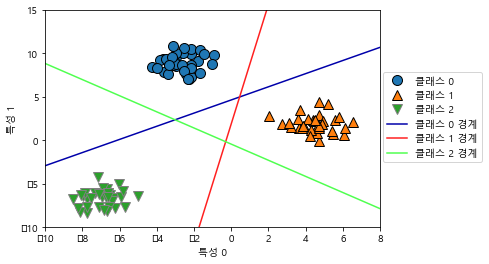

In [6]:
# 3개의 1:N 분류기가 만든 결정 경계
mglearn.discrete_scatter(X[:,0], X[:,1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                 mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(['클래스 0', '클래스 1', '클래스 2', '클래스 0 경계', '클래스 1 경계',
            '클래스 2 경계'], loc=(1.01, 0.3))
plt.show() # 책에는 없음

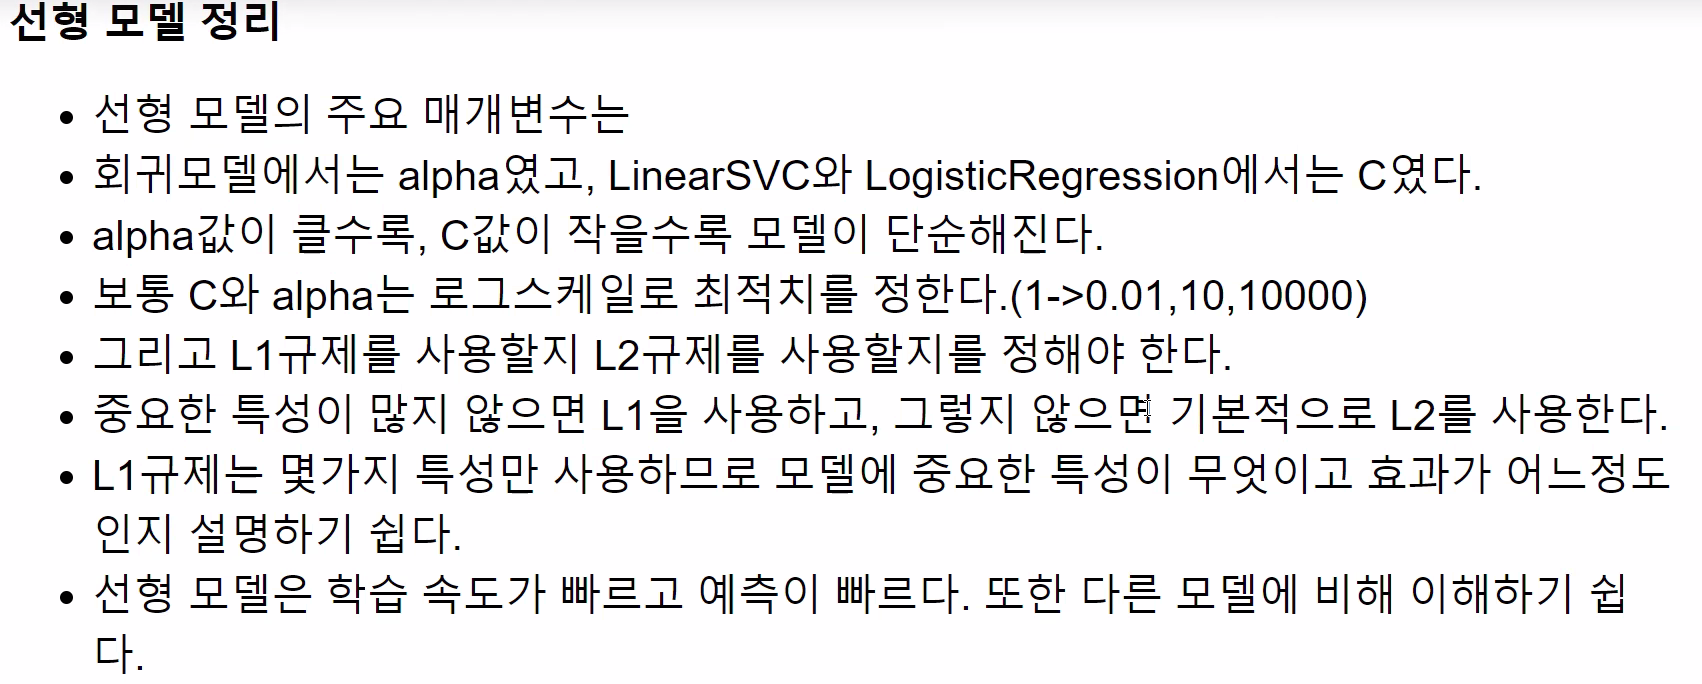

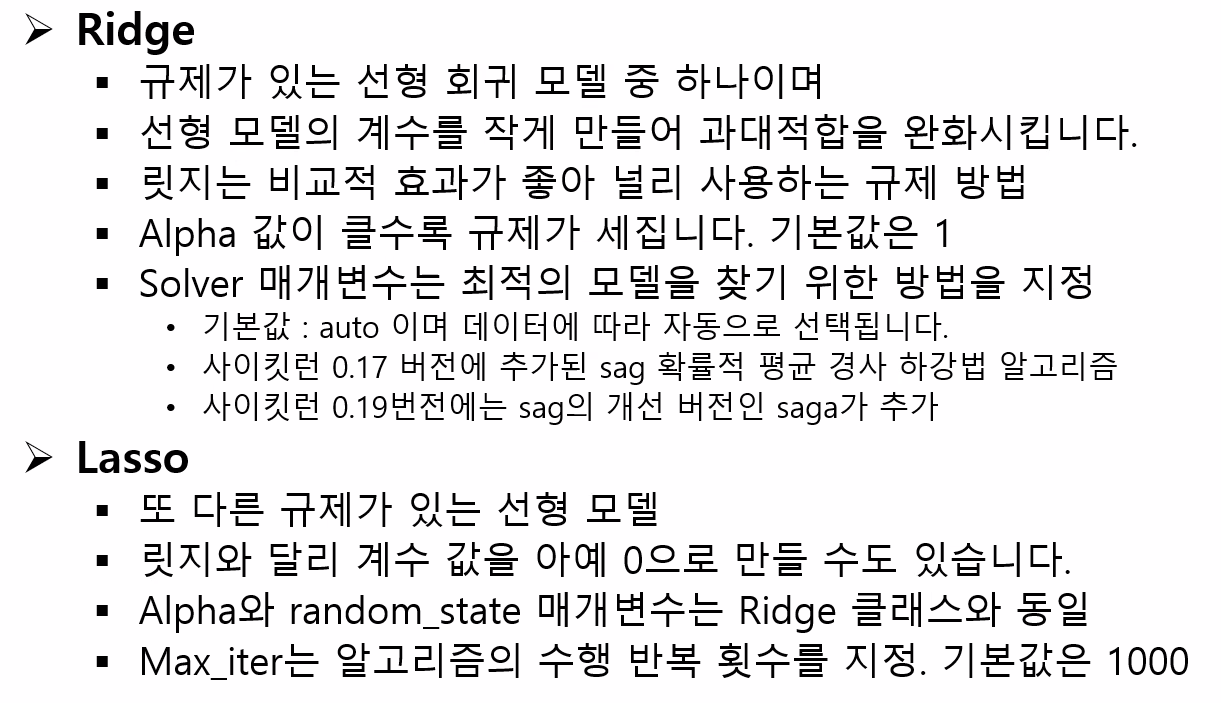

# 2. 나이브 베이즈 분류기

특성 카운트:
 {0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


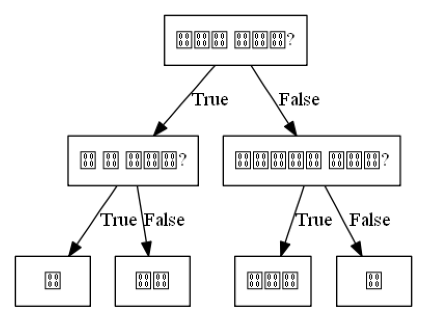

In [7]:
X = np.array([[0, 1, 0, 1],
              [1, 0, 1, 1],
              [0, 0, 0, 1],
              [1, 0, 1, 0]])
y = np.array([0, 1, 0, 1])
counts = {}
for label in np.unique(y):
    # 각 클래스에 대해 반복
    # 특성마다 1 이 나타난 횟수를 센다.
    counts[label] = X[y == label].sum(axis=0)
print("특성 카운트:\n", counts)
mglearn.plots.plot_animal_tree()

# 3. 결정트리
- 수학이 필요없어서 상대적으로 이해하기 쉬움
- 만들어진 모델을 쉽게 시각화 가능
- 정규화나 표준화 같은 전처리 과정이 필요 없다
- 모든 리프 노드가 순수 노드이므로 훈련 세트의 정확도는 100%이다. 즉, 트리의 훈련 데이터의 모든 데이터를 리프노드까지 분리하면 과적합이 일어날 수 있다. 
    - 가지치기를 사용해야한다.
        - 그래도 과대적합이 될 수 있다. 일반화하기가 힘들다
    - 과대적합의 문제의 대안으로 앙상블 방법을 사용

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False
f_path = 'C:\Windows\Fonts\malgun.ttf'
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font',family=font_name)


from sklearn.datasets import load_breast_cancer # 데이터
from sklearn.tree import DecisionTreeClassifier # tree.DecisionTreeClassifier
from sklearn.model_selection import train_test_split # 훈련,테스트분리
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data
                                                   ,cancer.target
                                                   ,stratify=cancer.target
                                                   ,random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print(f"훈련 세트 정확도 {tree.score(X_train,y_train) : .2f}")
print(f"테스트 세트 정확도 {tree.score(X_test,y_test) : .2f}")

훈련 세트 정확도  1.00
테스트 세트 정확도  0.94


In [36]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print(f"훈련 세트 정확도 {tree.score(X_train,y_train) : .2f}")
print(f"테스트 세트 정확도 {tree.score(X_test,y_test) : .2f}")

훈련 세트 정확도  0.99
테스트 세트 정확도  0.95


# 3-1. 트리 그래프 그리기

In [38]:
from sklearn.tree import export_graphviz
export_graphviz(tree
               ,out_file='tree.dot' # tree.dot이라고 파일을 만듦
               ,class_names=['cancer','not cancer']
               ,feature_names=cancer.feature_names
               ,impurity=False
               ,filled=True) 

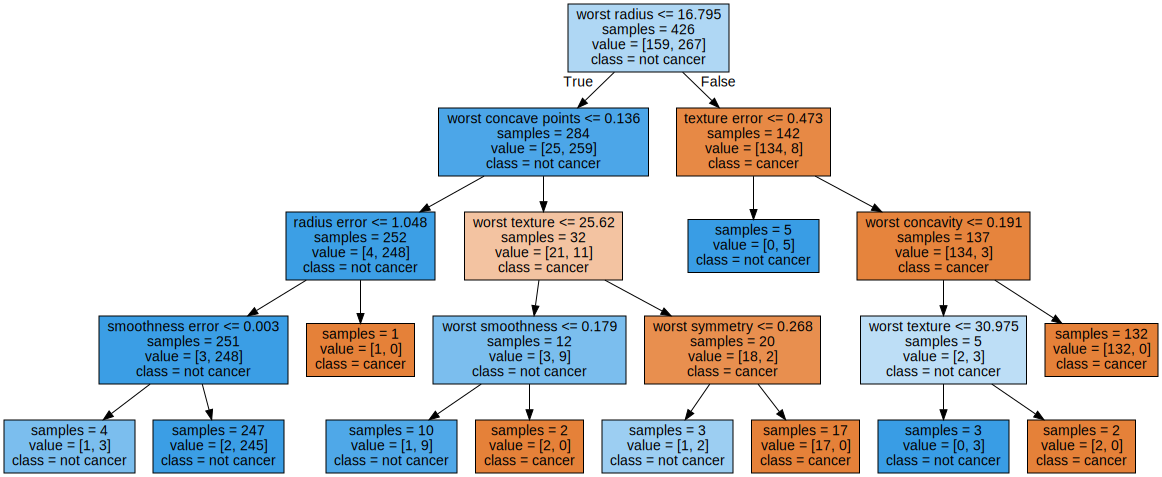

In [39]:
import graphviz
with open(("tree.dot"), "r", encoding='utf-8') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

# 3-2. 트리의 중요도 그래프로 그리기

In [47]:
print(f'특성 중요도 : \n {tree.feature_importances_}')

특성 중요도 : 
 [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


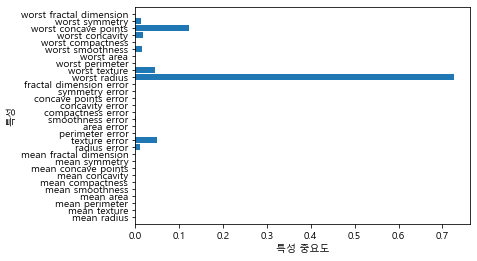

In [44]:
import numpy as np
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1, n_features)
plot_feature_importances_cancer(tree)

mean radius 0.000
mean texture 0.000
mean perimeter 0.000
mean area 0.000
mean smoothness 0.000
mean compactness 0.000
mean concavity 0.000
mean concave points 0.000
mean symmetry 0.000
mean fractal dimension 0.000
radius error 0.010
texture error 0.048
perimeter error 0.000
area error 0.000
smoothness error 0.002
compactness error 0.000
concavity error 0.000
concave points error 0.000
symmetry error 0.000
fractal dimension error 0.000
worst radius 0.727
worst texture 0.046
worst perimeter 0.000
worst area 0.000
worst smoothness 0.014
worst compactness 0.000
worst concavity 0.018
worst concave points 0.122
worst symmetry 0.012
worst fractal dimension 0.000


<AxesSubplot:>

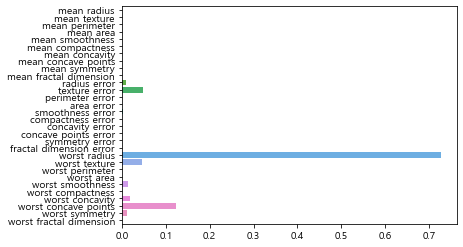

In [46]:
import seaborn as sns
%matplotlib inline

#feature별 importance별
for name, value in zip(cancer.feature_names, tree.feature_importances_):
    print(f'{name} {value:.3f}')
#feature importance를 column 별로 시각화하기    
sns.barplot(x=tree.feature_importances_, y=cancer.feature_names)

Feature importances: [0. 1.]


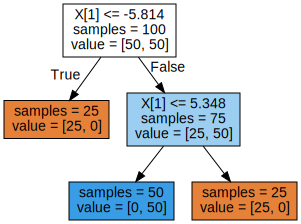

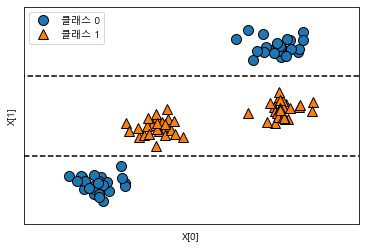

In [48]:
mglearn.plots.plot_tree_not_monotone()

# 3-3. 램 가격 그래프 ram_price
- 선형회귀
- 결정 트리(회귀)

-> 이 두 모델 중 예측을 누가 더 잘하나

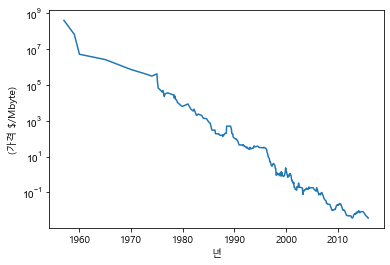

In [52]:
import pandas as pd
ram_prices = pd.read_csv('../data/ram_price.csv')

plt.yticks(fontname='Arial')
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("년")
plt.ylabel("(가격 $/Mbyte)")
plt.show()

In [53]:
ram_prices.head()

,Unnamed: 0,date,price
0,0,1957.0,411041792.0
1,1,1959.0,67947725.0
2,2,1960.0,5242880.0
3,3,1965.0,2642412.0
4,4,1970.0,734003.0


In [59]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

# 훈련데이터-2000년이전, 테스트데이터-2000년이후
data_train = ram_prices[ram_prices.date<2000]
data_test  = ram_prices[ram_prices.date>=2000]

# 가격 예측을 위해 날짜 특성만을 이용한다.
X_train = data_train.date.to_numpy()[:, np.newaxis]
# 데이터와 타깃 사이의 관계를 간단하게 만들기 위해 로그 스케일로 바꾸자
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

# 예측은 전체 기간에 대해 수행
X_all = ram_prices.date.to_numpy()[:, np.newaxis]
pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

# 예측한 값의 로그 스케일을 되돌린다.
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

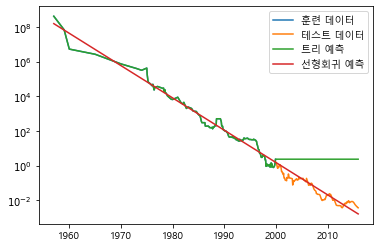

In [62]:
plt.yticks(fontname = "DejaVu Sans") # 한글 폰트가 지수에 음수를 표시하지 못하므로 ytick의 폰트를 바꾸어 줍니다.
plt.semilogy(data_train.date, data_train.price, label="훈련 데이터")
plt.semilogy(data_test.date, data_test.price, label="테스트 데이터")
plt.semilogy(ram_prices.date, price_tree, label="트리 예측")
plt.semilogy(ram_prices.date, price_lr, label="선형회귀 예측")
plt.legend()
plt.show() 

- 결정트리의 경우, 트리의 복잡도에 제한을 두지 않아 전체 데이터를 기억하기 때문에 범위 밖의 데이터로 가면서 마지막 포인트를 이용해 예측하는 것이 전부이다. 트리모델은 훈련 데이터 밖의 데이터를 예측하는데 적합하지않다.
- linear regression의 경우, 전체적으로 잘 예측하고 있다.

# 3-5. 결정 트리 앙상블 기법
- 여러 머신러닝 모델을 연결하여 더 강력한 모델을 만드는 기법
- 서로 다른 방향으로 과대적합된 트리를 많이 만들면 그 결과를 평균냄으로써 과대적합된 양을 줄일 수 있다.
- 똑똑한사람1명보다 덜똑똑한사람 여러명이 낫다.
- n_estimators는 클수록 좋다. 더 많은 트리를 사용하면 과대적합을 줄여 안정적인 모델을 만들 수 있기 때문이다.(메모리와 훈련시간은 증가함)
- max_features는 각 트리가 얼마나 무작위가 될지를 결정하며, 작은 max_features는 과대적합을 줄인다. 일바적으로는 기본값을 쓰면된다.

#### 특징
- 부스팅: 중복된 데이터를 허용

훈련 세트 정확도 1.0
테스트 세트 정확도 0.972027972027972


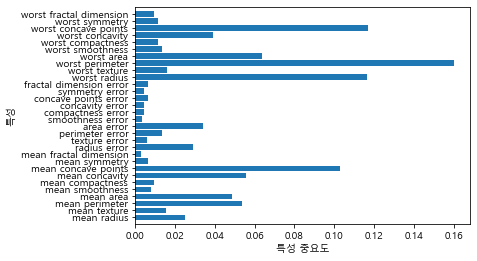

In [64]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data
                                                   ,cancer.target
                                                   ,random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)
print(f'훈련 세트 정확도 {forest.score(X_train,y_train)}')
print(f'테스트 세트 정확도 {forest.score(X_test,y_test)}')

# 특성 중요도 시각화 하기
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1, n_features)
plt.show()
plot_feature_importances_cancer(forest)

- 단일 트리의 결과와 마찬가지로 랜덤 포레스트도 "worst radius"특성이 중요하다고 보지만, 가장 많은 정보를 가진 특성으로는 "worst perimeter"를 선택했다.
- 랜덤 포레스트가 단일 트리보다 더 넓은 시각으로 데이터를 바라볼 수 있다

### 보팅 - 일반적으로 서로 다른 알고리즘을 가진 분류기를 결합하는 것

### 배깅 - 모두 같은 유형의 알고리즘 기반이지만, 데이터 샘플링을 서로 다르게 가져가면서 학습을 수행하는것이다. ex)랜덤포레스트


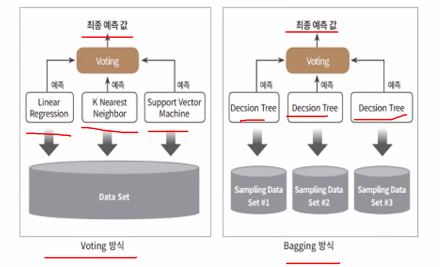

### 그래디언트 부스팅 - 여러개의 결정트리를 묶어 강력한 모델을 만드는 앙상블 기법
- 결정트리는 잘나오는모데 하나만 쓰는거고
- 랜덤포레스트는 여러개 모델들의 평균을 냄


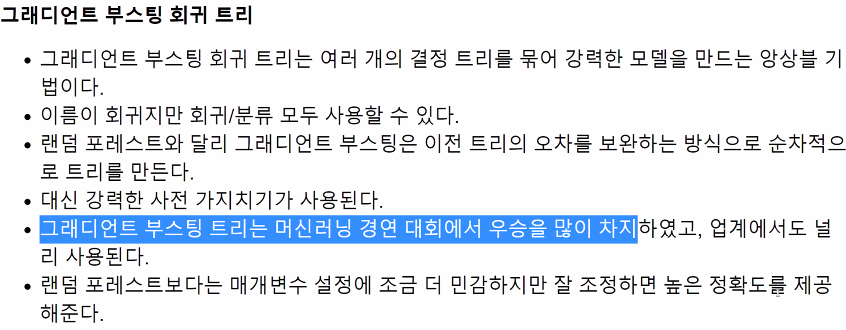

### decision tree = 가장 좋은 결과를 내는 트리 1개
#### random forest = 여러 트리들의 평균을 낸다.

In [65]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(cancer.data
                                                   ,cancer.target
                                                   ,random_state=0)
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train,y_train)

print(f'훈련 세트 정확도 {gbrt.score(X_train, y_train) : .3f}')
print(f'테스트 세트 정확도 {gbrt.score(X_test, y_test) : .3f}')

훈련 세트 정확도  1.000
테스트 세트 정확도  0.965


In [66]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train,y_train)

print(f'훈련 세트 정확도 {gbrt.score(X_train, y_train) : .3f}')
print(f'테스트 세트 정확도 {gbrt.score(X_test, y_test) : .3f}')

훈련 세트 정확도  0.991
테스트 세트 정확도  0.972


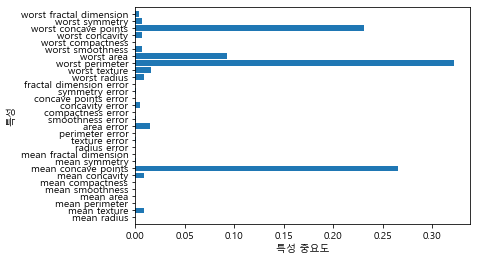

In [67]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

plot_feature_importances_cancer(gbrt)

# 4. 서포트 벡터 머신(SVM)
- 선형 모델과 비선형 특성

#### SVM에 적용

In [70]:
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(cancer.data
                                                   ,cancer.target
                                                   ,random_state=0)
svc = SVC()
svc.fit(X_train, y_train)
print(f'훈련 세트 정확도 {gbrt.score(X_train, y_train) : .3f}')
print(f'테스트 세트 정확도 {gbrt.score(X_test, y_test) : .3f}')

훈련 세트 정확도  0.991
테스트 세트 정확도  0.972


#### SVM을 위한 데이터 스케일링

In [71]:
## SVM을 위한 데이터 전처리

#훈련 세트에서 특성별 최솟값 계산
min_on_training=X_train.min(axis=0)
#훈련 세트에서 특성별 (최댓값 - 최솟값) 범위 계산
range_on_training = (X_train-min_on_training).max(axis=0)

#훈련 데이터에 최솟값을 뺴고 범위로 나누면 각 특성에 대해 최솟값은 0 최댓값은 1

X_train_scaled = (X_train -min_on_training) / range_on_training

print('특성별 최솟값 \n', X_train_scaled.min(axis=0))
print('특성별 최댓값 \n', X_train_scaled.max(axis=0))

특성별 최솟값 
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
특성별 최댓값 
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [72]:
import pandas as pd
cancer_data=cancer.data
cancer_df = pd.DataFrame(data=cancer_data, columns=cancer.feature_names)
cancer_df.tail(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
559,11.51,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.04105,0.1388,0.06570,...,12.480,37.16,82.28,474.2,0.12980,0.25170,0.3630,0.09653,0.2112,0.08732
560,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,0.1537,0.06171,...,15.300,33.17,100.20,706.7,0.12410,0.22640,0.1326,0.10480,0.2250,0.08321
561,11.20,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,0.1060,0.05502,...,11.920,38.30,75.19,439.6,0.09267,0.05494,0.0000,0.00000,0.1566,0.05905
562,15.22,30.62,103.40,716.9,0.10480,0.20870,0.25500,0.09429,0.2128,0.07152,...,17.520,42.79,128.70,915.0,0.14170,0.79170,1.1700,0.23560,0.4089,0.14090
563,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,0.06879,...,24.290,29.41,179.10,1819.0,0.14070,0.41860,0.6599,0.25420,0.2929,0.09873
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.22160,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.16280,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.14180,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.26500,0.4087,0.12400
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.00000,0.2871,0.07039


In [73]:
cancer_data=X_train_scaled
cancer_df = pd.DataFrame(data=cancer_data, columns=cancer.feature_names)
cancer_df.tail(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
416,0.362488,0.296266,0.348421,0.221633,0.366895,0.163003,0.121649,0.138718,0.176263,0.075611,...,0.303451,0.357676,0.276856,0.158720,0.284158,0.174356,0.194649,0.269652,0.175439,0.071625
417,0.076483,0.368880,0.071177,0.032959,0.594873,0.133861,0.000000,0.000000,0.557071,0.497683,...,0.036357,0.277719,0.031077,0.013493,0.419534,0.048879,0.000000,0.000000,0.310861,0.171324
418,0.309007,0.380913,0.306199,0.175864,0.578582,0.326416,0.201031,0.267445,0.376768,0.228096,...,0.244397,0.404584,0.233677,0.120429,0.473024,0.222866,0.274601,0.500517,0.217031,0.143120
419,0.375740,0.216598,0.363900,0.230498,0.307918,0.226389,0.129780,0.160089,0.316667,0.141744,...,0.329064,0.165245,0.306738,0.177300,0.233309,0.244307,0.251677,0.395109,0.221368,0.181621
420,0.565999,0.481328,0.551517,0.418452,0.406864,0.286008,0.253046,0.395179,0.263636,0.097936,...,0.602277,0.388060,0.575178,0.413095,0.317837,0.200163,0.214617,0.616259,0.194362,0.071166
421,0.559847,0.426141,0.532859,0.406575,0.397524,0.135128,0.187910,0.290408,0.247475,0.000000,...,0.427962,0.327292,0.391404,0.258258,0.350855,0.086067,0.176518,0.445746,0.197516,0.015283
422,0.259312,0.594606,0.277659,0.140997,0.716520,0.754126,0.532568,0.424602,0.489899,0.683867,...,0.254714,0.763859,0.235271,0.129326,0.753682,1.000000,0.882588,0.761281,0.552139,1.000000
423,0.116191,0.357261,0.110773,0.057306,0.524275,0.137593,0.063496,0.069881,0.225253,0.413437,...,0.145500,0.346482,0.126401,0.062525,0.410289,0.075298,0.091374,0.174027,0.175241,0.172635
424,0.129632,0.353112,0.117062,0.061336,0.183230,0.013903,0.000000,0.000000,0.299495,0.305602,...,0.072501,0.234808,0.058967,0.029149,0.000000,0.000000,0.000000,0.000000,0.067810,0.069198
425,0.214350,0.590041,0.212356,0.110286,0.434235,0.283268,0.260544,0.204026,0.165657,0.331508,...,0.161864,0.670043,0.158723,0.071028,0.387176,0.217724,0.289936,0.332518,0.107826,0.211728


In [74]:
#테스트 세트에도 같은 작업을 적용하지만 훈련 세트에서 계산한 최솟값과 범위를 시용합니다,(자세한 내용은 3장)
X_test_scaled = (X_test - min_on_training) /range_on_training

In [75]:
svc=SVC()
svc.fit(X_train_scaled,y_train)


print('훈련 세트 정확도: {:.3f}'.format(svc.score(X_train_scaled, y_train)))
print('테스트 세트 정확도: {:.3f}'.format(svc.score(X_test_scaled, y_test)))

훈련 세트 정확도: 0.984
테스트 세트 정확도: 0.972


In [76]:
svc = SVC(C=20)
svc.fit(X_train_scaled, y_train)

print('훈련 세트 정확도: {:.3f}'.format(svc.score(X_train_scaled, y_train)))
print('테스트 세트 정확도: {:.3f}'.format(svc.score(X_test_scaled, y_test)))

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.979
